In [16]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [6]:
# Read in project data
np_df = pd.read_csv('../Week4/data/national_park_species.csv')
np_df.head()

,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,ParkAccepted,Sensitive,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,True,False,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,"Northern White-tailed Deer, Virginia Deer, Whi...",True,False,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,"Coyote, Eastern Coyote",True,False,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5
3,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",True,False,...,NaN,2,0,0,NaN,E,NaN,NaN,G5,ME: SH
4,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",True,False,...,NaN,16,0,0,NaN,NaN,NaN,NaN,G5,ME: S5


## Data Preprocessing

In [10]:
# Encode categorical variables
for col in ['CategoryName', 'Order', 'Family', 'GRank', 'ParkName', 'Sensitive', 'Nativeness', 'Observations']:
    np_df[f"{col}_cat"] = np_df[col].astype('category').cat.codes
    
np_df.columns

Index(['ParkCode', 'ParkName', 'CategoryName', 'Order', 'Family',
       'TaxonRecordStatus', 'SciName', 'CommonNames', 'ParkAccepted',
       'Sensitive', 'RecordStatus', 'Occurrence', 'OccurrenceTags',
       'Nativeness', 'NativenessTags', 'Abundance', 'NPSTags', 'ParkTags',
       'References', 'Observations', 'Vouchers', 'ExternalLinks', 'TEStatus',
       'StateStatus', 'OzoneSensitiveStatus', 'GRank', 'SRank',
       'CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'ParkName_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')

## Set up the model

In [11]:
# Split data into X and y
X = np_df[['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat']]
y = np_df['ParkName_cat']

In [14]:
# Split data into traiing and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

## KNN Model

In [17]:
# Initialize KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [18]:
# Calculate accuracy score (feed it our test and predicted data)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.556119109947644


## Visualize KNN Results

In [24]:
# Create a function that iterates through different k values to find the best
def knn():
    
    k_values = [3,5,7,9,11]
    accuracies = [ ]
    
    for k in k_values:
        # Loop through different K values in the model to obtain accuracy
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_scaled, y_train)

        # Make predictions and calculate accuracy
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f"K={k} - Accuracy: {accuracy:.3f}")
        
    # Visualize the effect of K on accuracy
    plt.figure(figsize = (10,6))
    plt.plot(k_values, accuracies, marker = '*')
    plt.xlabel('Number of neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN: Effect of K on Model Accuracy')
    plt.grid(True)
    plt.show

K=3 - Accuracy: 0.552
K=5 - Accuracy: 0.556
K=7 - Accuracy: 0.553
K=9 - Accuracy: 0.557
K=11 - Accuracy: 0.556


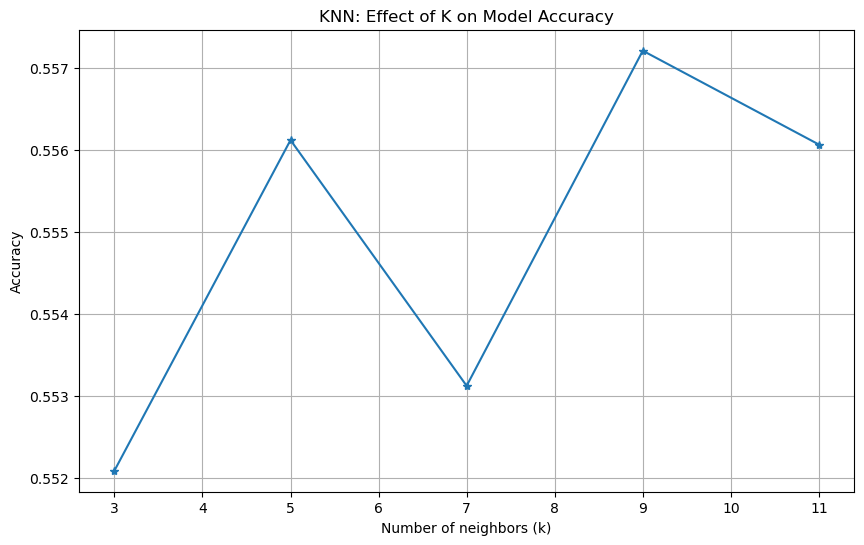

In [25]:
knn()

In [30]:
def decision_tree():
    
    # Different possible max depths
    max_depths = [2, 3, 4, 5]
    accuracies = []
    
    # loop through with different max depths and run a DT model/report accuracies
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth = depth)
        dt.fit(X_train_scaled, y_train)
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Max Depth: {depth} - Accuracy: {accuracy:.3f}")

In [31]:
decision_tree()

Max Depth: 2 - Accuracy: 0.464
Max Depth: 3 - Accuracy: 0.497
Max Depth: 4 - Accuracy: 0.511
Max Depth: 5 - Accuracy: 0.531


## Visualize Model 

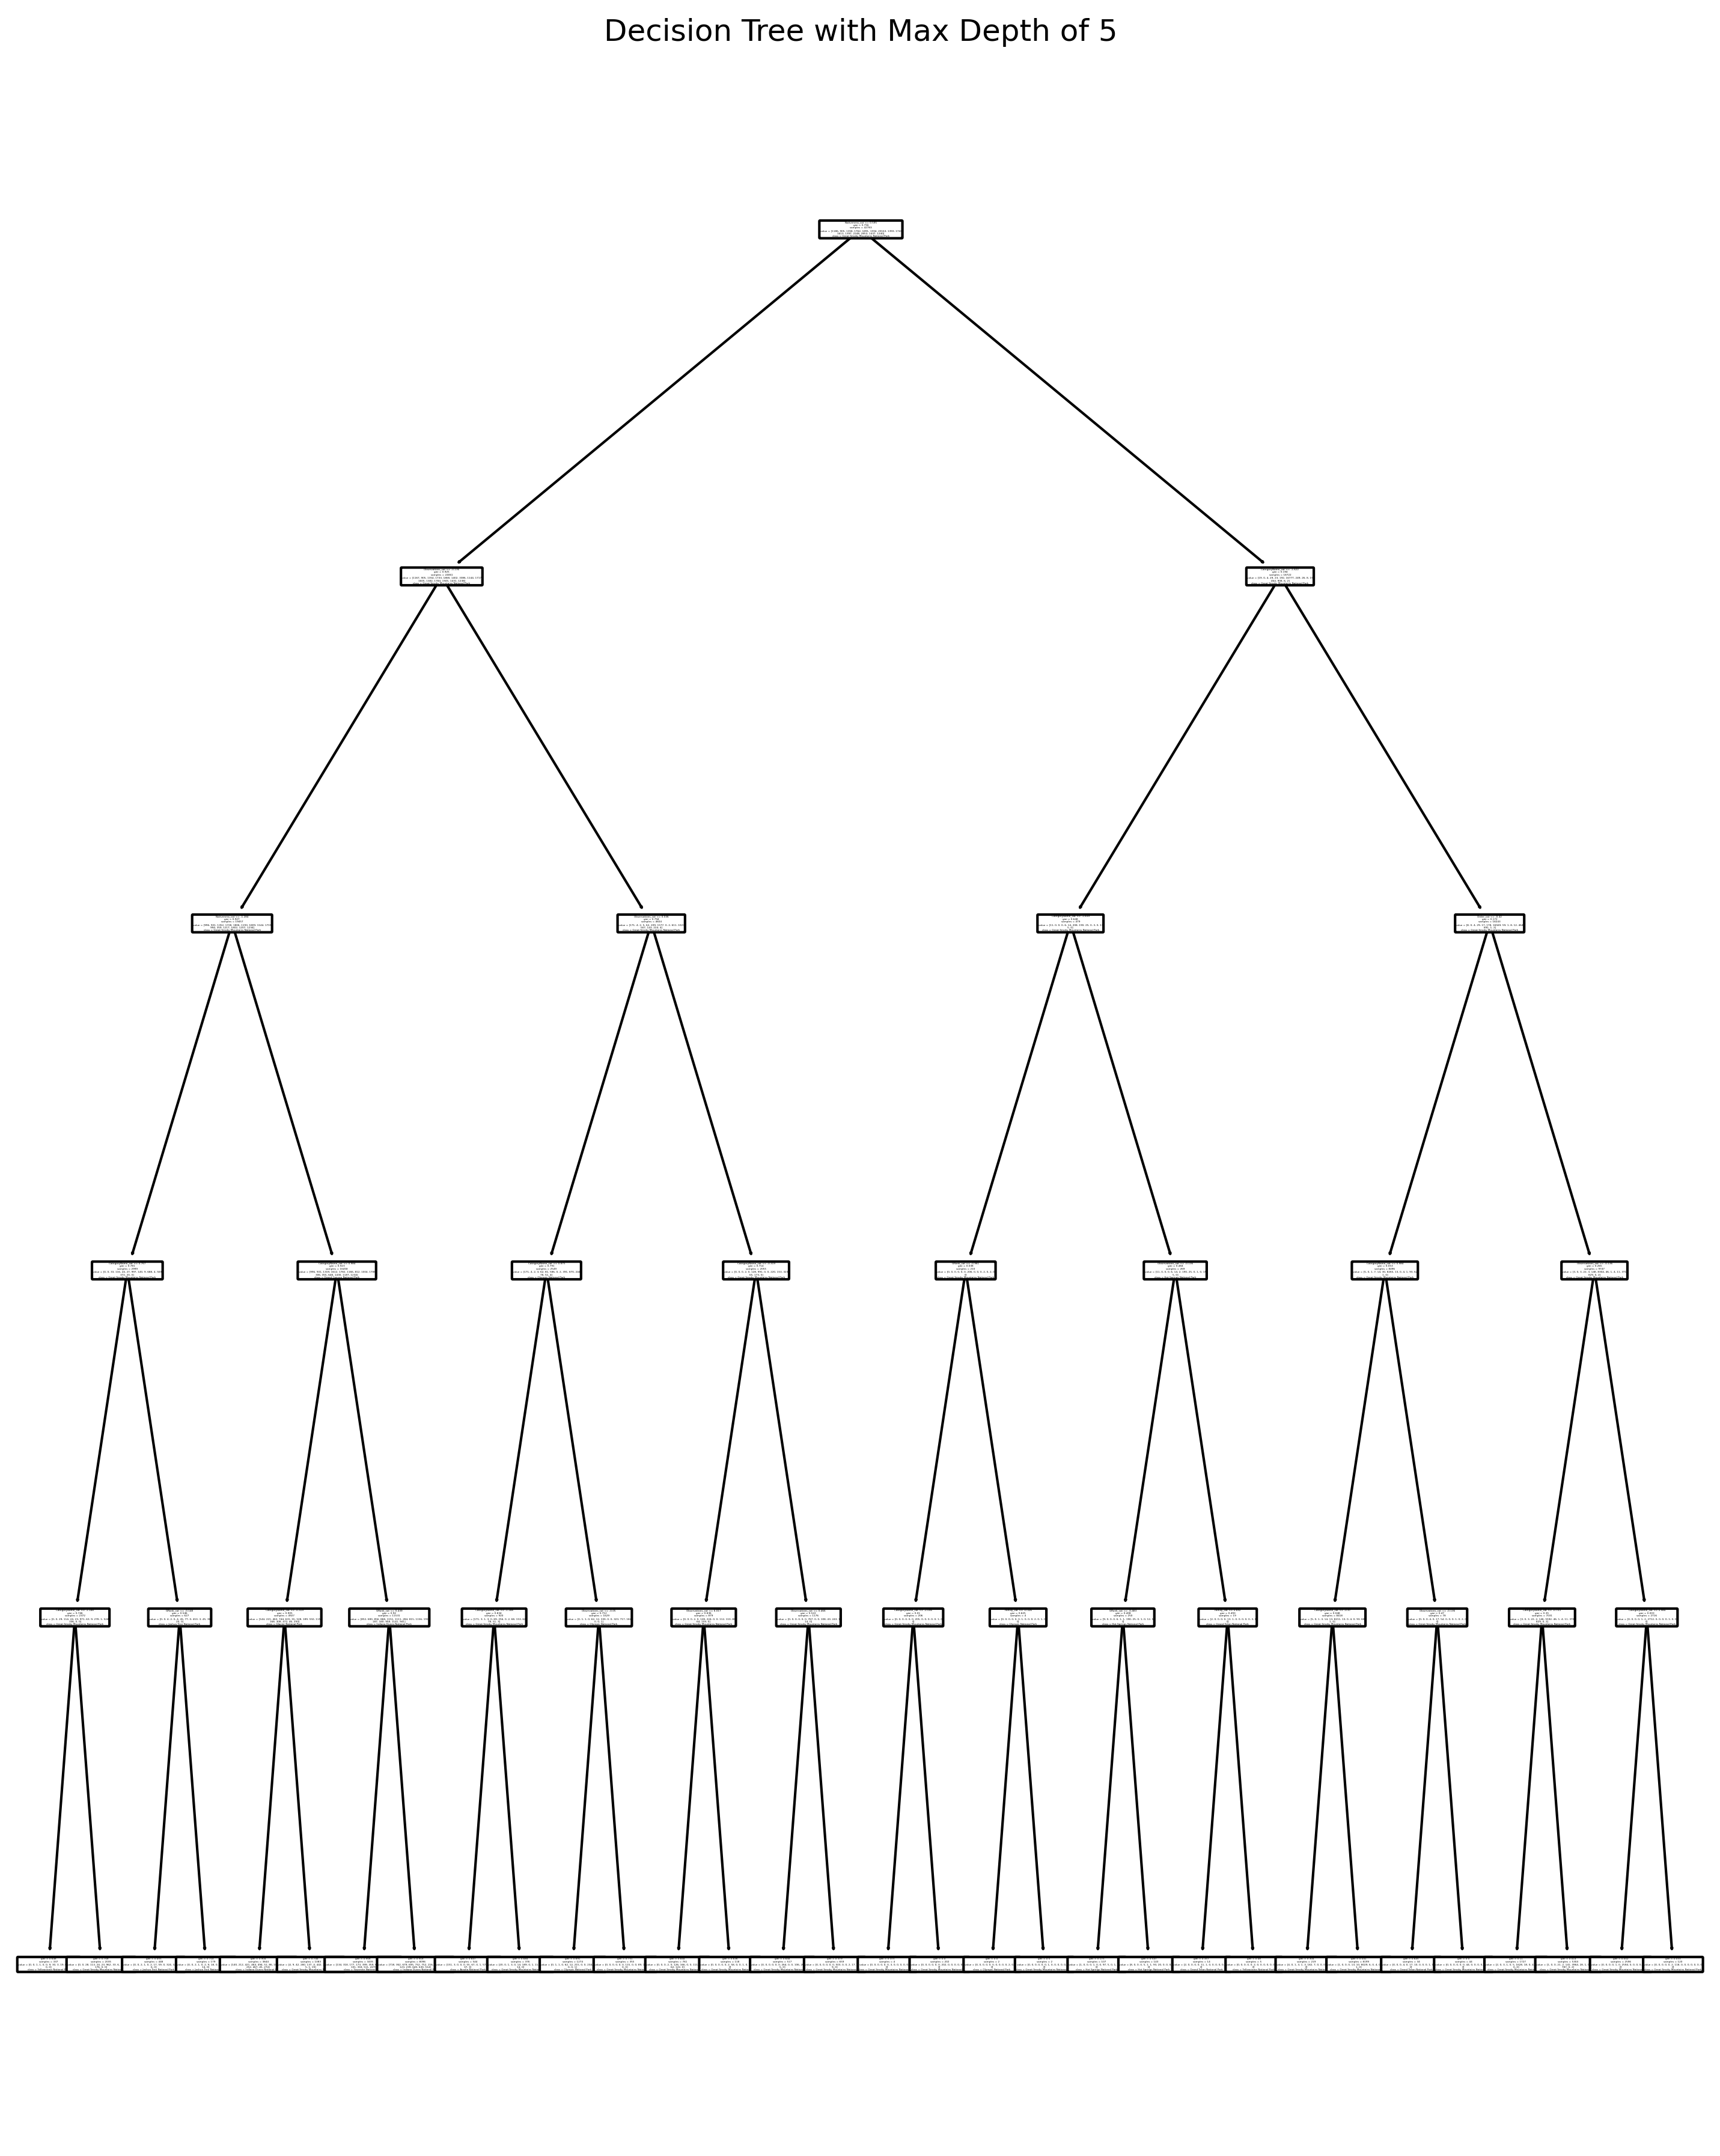

In [46]:
# Visualize the best performing tree
dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_scaled, y_train)

# Create the mapping from numeric classes to descriptive names
class_mapping = dict(zip(dt_best.classes_, np_df.ParkName.unique()))

# Convert class labels in dt.classes_ to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt_best.classes_]

# Plot decision Trees
plt.figure(figsize = (12, 15), dpi = 300)
plot_tree(dt_best, feature_names = X.columns, class_names = class_names_str, rounded = True)

plt.title("Decision Tree with Max Depth of 5")
plt.savefig('decision_tree.png')
plt.show()

In [45]:
# Look more closely at node values
dt_best.tree_.value[2]

array([[ 996.,  901., 1352., 1728., 1806., 1193., 1809., 1144., 1715.,
         994.,  359., 1217., 1802., 1207., 1234.]])

In [47]:
# find important features
dt_best.feature_importances_
X.columns

Index(['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')